# Objective

To classify the iris flowers based on their features in Iris-setosa, Iris-versicolor and Iris-virginica

In [1]:
#importing necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
import os
dataset = pd.read_csv('../iris_classification/Iris.csv')

In [3]:
#dataset : 
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# checking for any null values in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# statistical description of dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# analyzing each species with their features individually
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
dataset.groupby(['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [8]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Dropping unimportant column 'Id'
dataset.drop('Id', axis=1, inplace=True)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

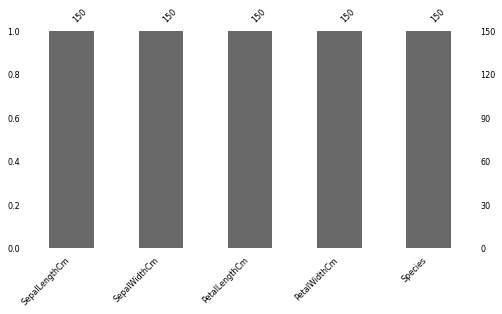

In [10]:
# Checking for any missing data 
import missingno
missingno.bar(dataset, figsize=(8,4), fontsize=8)

<AxesSubplot:>

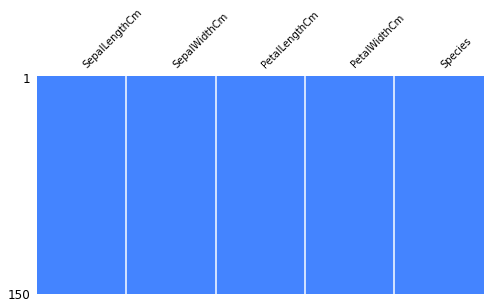

In [11]:
missingno.matrix(dataset, figsize=(8,4), sparkline=False, fontsize=10, color=(0.27, 0.52, 1.0))

In [12]:
# remove duplicate rows
dataset.drop_duplicates(inplace=True)

## Exploratory Data Analysis

###  1. Relationship between sepal length and sepal width


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

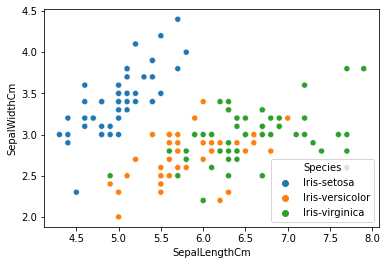

In [13]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data = dataset)   # using pandas.DataFrame.plot module

###  2. Relationship between petal length and petal width

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

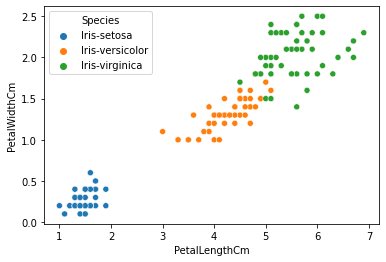

In [14]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=dataset, hue='Species')

#### Exploring all types of relationships across the entire data set. Using pairplot to recreate the plot below.

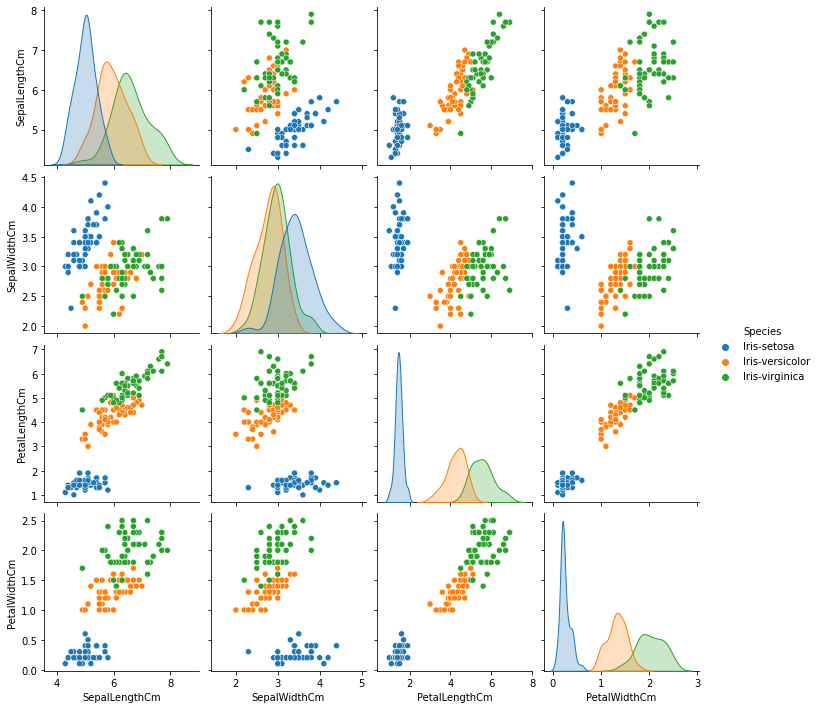

In [15]:
sns.pairplot(dataset, hue='Species')

### The above plot shows that the species can be classify using given feature.

## Analyzing the heatmap to get better idea about the data

<AxesSubplot:>

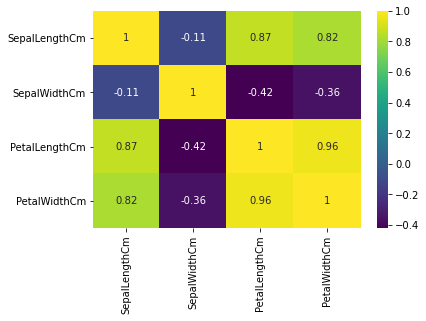

In [16]:
sns.heatmap(dataset.corr(),cmap='viridis', annot=True)

## Creating boxplots

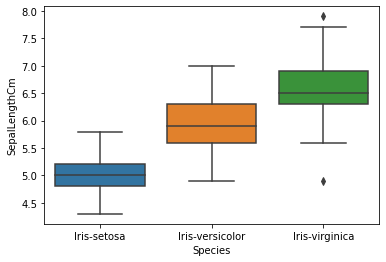

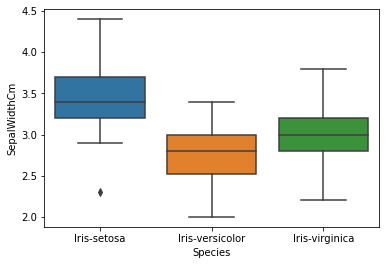

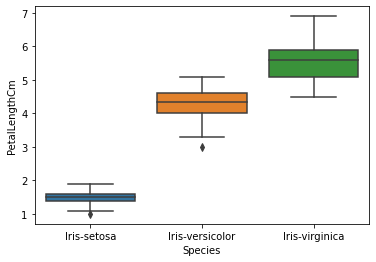

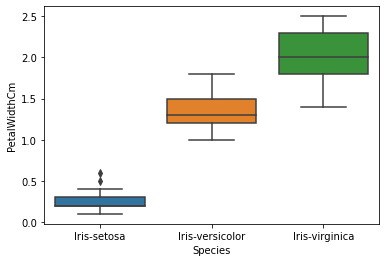

In [17]:
for i in 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' :
    sns.boxplot(x='Species', y=i, data=dataset)
    plt.show()

## Train-Test Split

In [18]:
X = dataset.drop('Species',axis=1)
y = dataset['Species']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=52)

In [20]:
#X_train dataset before scaling
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
2,4.7,3.2,1.3,0.2
110,6.5,3.2,5.1,2.0
31,5.4,3.4,1.5,0.4
18,5.7,3.8,1.7,0.3
95,5.7,3.0,4.2,1.2


In [21]:
[X_train.shape, y_train.shape]

[(110, 4), (110,)]

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [23]:
scaled_X_train = scale.fit_transform(X_train)
scaled_X_test = scale.fit_transform(X_test)

In [24]:
#X_train dataset after scaling
pd.DataFrame(scaled_X_train).head()

,0,1,2,3
0,-1.410905,0.290349,-1.361171,-1.288459
1,0.856621,0.290349,0.791570,1.030767
2,-0.529089,0.763511,-1.247869,-1.030767
3,-0.151168,1.709836,-1.134566,-1.159613
4,-0.151168,-0.182813,0.281710,0.000000


## Training the model using Multiclass Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [46]:
logisticR = LogisticRegression(random_state=0, max_iter=800, 
    solver='saga', multi_class='multinomial')

In [47]:
logisticR.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=800, multi_class='multinomial', random_state=0,
                   solver='saga')

In [48]:
# Best parameters 
grid_log_model.best_params_

{'C': 7.742636826811269,
 'l1_ratio': 0.9473684210526315,
 'penalty': 'elasticnet'}

### Testing and Model performance evaluation

In [49]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [50]:
y_predict = grid_log_model.predict(scaled_X_test)

In [51]:
y_predict

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [52]:
# Accuracy score of our model : 
accuracy_score(y_test, y_predict) * 100

94.5945945945946

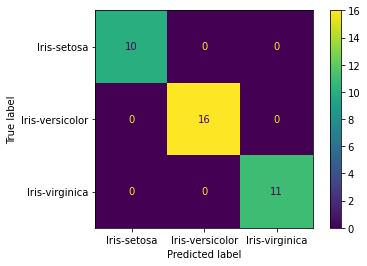

In [53]:
# Analyzing the confusion matrix
plot_confusion_matrix(grid_log_model, scaled_X_test, y_predict)

In [54]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.95        37
      macro avg       0.95      0.95      0.95        37
   weighted avg       0.95      0.95      0.95        37

